In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Transported
True     4378
False    4315
Name: count, dtype: int64


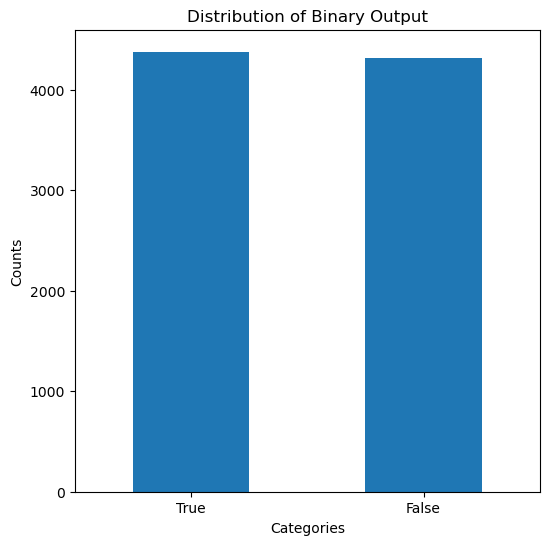

In [3]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate counts of each category
counts = train_data['Transported'].value_counts()
print(counts)

# Plotting
plt.figure(figsize=(6, 6))
counts.plot(kind='bar')
plt.title('Distribution of Binary Output')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x-labels if needed
plt.show()

In [4]:
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']
# Split the data into training and testing sets with stratification
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)

# Creating dataframes from the split data
train_df = pd.concat([X_train, y_train], axis=1)
valid_df = pd.concat([X_valid, y_valid], axis=1)

In [5]:
nulls = train_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

HomePlanet 159
CryoSleep 175
Cabin 160
Destination 140
Age 148
VIP 160
RoomService 139
FoodCourt 149
ShoppingMall 172
Spa 146
VRDeck 150
Name 152


In [6]:
nulls = valid_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

HomePlanet 42
CryoSleep 42
Cabin 39
Destination 42
Age 31
VIP 43
RoomService 42
FoodCourt 34
ShoppingMall 36
Spa 37
VRDeck 38
Name 48


In [7]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

HomePlanet 87
CryoSleep 93
Cabin 100
Destination 92
Age 91
VIP 93
RoomService 82
FoodCourt 106
ShoppingMall 98
Spa 101
VRDeck 80
Name 94


In [8]:
from data_preprocessing import *
train_df,valid_df,test_data=preprocess_data(train_df,test_data,valid_df)
train_df.to_csv('training_post.csv',index=False)
valid_df.to_csv('valid_post.csv',index=False)
test_data.to_csv('test_post.csv',index=False)

[0.0, 6.0, 12.0, 18.0, 24.0, 30.0, 36.0, 42.0, 48.0, 54.0, 60.0, 66.0, 72.0, 78.0, 84.0, inf]
['0-6', '6-12', '12-18', '18-24', '24-30', '30-36', '36-42', '42-48', '48-54', '54-60', '60-66', '66-72', '72-78', '78-84', '84+']
[0.0, 6.0, 12.0, 18.0, 24.0, 30.0, 36.0, 42.0, 48.0, 54.0, 60.0, 66.0, 72.0, 78.0, 84.0, inf]
['0-6', '6-12', '12-18', '18-24', '24-30', '30-36', '36-42', '42-48', '48-54', '54-60', '60-66', '66-72', '72-78', '78-84', '84+']
[0.0, 6.0, 12.0, 18.0, 24.0, 30.0, 36.0, 42.0, 48.0, 54.0, 60.0, 66.0, 72.0, 78.0, 84.0, inf]
['0-6', '6-12', '12-18', '18-24', '24-30', '30-36', '36-42', '42-48', '48-54', '54-60', '60-66', '66-72', '72-78', '78-84', '84+']


In [9]:
nulls = train_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

Name 152
First_name 152
Surname 152
deck 160
num 160
side 160


In [10]:
nulls = valid_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

Name 48
First_name 48
Surname 48
deck 39
num 39
side 39


In [11]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

Name 94
First_name 94
Surname 94
deck 100
num 100
side 100


In [12]:
#drop columns Name,First_name,Surname,deck,num,side
cols=['PassengerId','Name','First_name','Surname','deck','num','side']
train_df.drop(columns=cols,inplace=True)
valid_df.drop(columns=cols,inplace=True)
test_data.drop(columns=cols,inplace=True)

In [13]:
train_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age Interval',
       'expenses', 'Transported'],
      dtype='object')

In [14]:
cate_col=['HomePlanet','Destination','Age Interval']
def adjust_cols(df,cols):
    for item in cols:
        tem=pd.get_dummies(df[item],columns=[item])
        value_index = df.columns.get_loc(item)
        df.drop(item, axis=1, inplace=True)
        df_left = df.iloc[:, :value_index]
        df_right = df.iloc[:, value_index:]
        df = pd.concat([df_left, tem, df_right], axis=1)
    return df
train_df=adjust_cols(train_df,cate_col)
valid_df=adjust_cols(valid_df,cate_col)
test_data=adjust_cols(test_data,cate_col)

In [15]:
train_df

,Earth,Europa,Mars,CryoSleep,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,...,42-48,48-54,54-60,60-66,66-72,72-78,78-84,84+,expenses,Transported
0,False,True,False,False,False,False,True,35.0,False,0.0,...,False,False,False,False,False,False,False,False,3225.000000,False
1,True,False,False,False,False,False,True,37.0,False,541.0,...,False,False,False,False,False,False,False,False,1608.000000,False
2,False,False,True,False,False,False,True,20.0,False,984.0,...,False,False,False,False,False,False,False,False,1973.077381,False
3,True,False,False,False,False,False,True,28.0,False,3202.0,...,False,False,False,False,False,False,False,False,3435.069328,False
4,False,True,False,False,True,False,False,30.0,False,0.0,...,False,False,False,False,False,False,False,False,5882.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,False,False,True,True,False,False,True,19.0,False,0.0,...,False,False,False,False,False,False,False,False,0.000000,True
6950,False,True,False,True,True,False,False,27.0,False,0.0,...,False,False,False,False,False,False,False,False,0.000000,True
6951,True,False,False,False,False,False,True,20.0,False,402.0,...,False,False,False,False,False,False,False,False,809.000000,False
6952,True,False,False,False,False,False,True,51.0,False,172.0,...,False,True,False,False,False,False,False,False,1543.000000,False


In [16]:
train_df.loc[:,train_df.columns!='Transported'].corr()

,Earth,Europa,Mars,CryoSleep,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,...,36-42,42-48,48-54,54-60,60-66,66-72,72-78,78-84,84+,expenses
Earth,1.000000,-0.627757,-0.558101,-0.120112,-0.159175,0.230978,-0.003400,-0.211921,-0.166548,-0.142180,...,-0.064004,-0.081003,-0.038693,-0.059662,-0.026618,-0.023071,-0.009963,0.013869,NaN,-0.294836
Europa,-0.627757,1.000000,-0.295551,0.104536,0.302321,-0.167752,-0.163224,0.226098,0.138578,-0.059028,...,0.079000,0.070183,0.052157,0.068429,0.036163,0.003202,0.006268,-0.003068,NaN,0.407616
Mars,-0.558101,-0.295551,1.000000,0.035977,-0.126918,-0.104654,0.178167,0.019069,0.056679,0.237417,...,-0.005663,0.024599,-0.008111,0.000278,-0.005882,0.024901,0.005546,-0.013750,NaN,-0.072667
CryoSleep,-0.120112,0.104536,0.035977,1.000000,0.064192,0.089647,-0.113106,-0.073597,-0.082718,-0.250291,...,-0.025373,-0.018809,-0.011585,-0.000794,-0.008632,0.006687,-0.012331,-0.008953,NaN,-0.389698
55 Cancri e,-0.159175,0.302321,-0.126918,0.064192,1.000000,-0.161648,-0.786165,0.028568,0.044698,-0.021762,...,0.028751,0.018950,0.010027,0.022789,-0.018764,-0.006079,-0.007718,0.012656,NaN,0.136074
PSO J318.5-22,0.230978,-0.167752,-0.104654,0.089647,-0.161648,1.000000,-0.482807,-0.037545,-0.004561,-0.061078,...,-0.011334,-0.011493,-0.006814,-0.029254,-0.004644,0.005858,0.001816,-0.008452,NaN,-0.100387
TRAPPIST-1e,-0.003400,-0.163224,0.178167,-0.113106,-0.786165,-0.482807,1.000000,-0.001838,-0.036808,0.057562,...,-0.018416,-0.009619,-0.004631,-0.001903,0.019559,0.001726,0.005712,-0.005938,NaN,-0.057884
Age,-0.211921,0.226098,0.019069,-0.073597,0.028568,-0.037545,-0.001838,1.000000,0.092608,0.072376,...,0.223107,0.300653,0.331846,0.367411,0.328306,0.220276,0.168538,0.091968,NaN,0.188996
VIP,-0.166548,0.138578,0.056679,-0.082718,0.044698,-0.004561,-0.036808,0.092608,1.000000,0.065921,...,0.022940,0.001337,0.024544,0.042014,0.006186,0.023650,0.009750,-0.004103,NaN,0.152963
RoomService,-0.142180,-0.059028,0.237417,-0.250291,-0.021762,-0.061078,0.057562,0.072376,0.065921,1.000000,...,0.015915,0.017275,-0.003456,0.000307,0.006042,0.006966,0.005307,0.039665,NaN,0.259299


In [17]:
x_train=train_df.loc[:,train_df.columns!='Transported']
y_train=train_df.loc[:,train_df.columns=='Transported']
x_valid=valid_df.loc[:,valid_df.columns!='Transported']
y_valid=valid_df.loc[:,valid_df.columns=='Transported']

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',solver='liblinear',class_weight='balanced')
log_reg.fit(x_train, y_train)
y_pred=log_reg.predict(x_valid)
print(accuracy_score(y_valid, y_pred))

0.7860839562967222


C:\Users\Sajin.LAPTOP-RE0DL8PH\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

       False       0.79      0.78      0.78       863
        True       0.79      0.79      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [20]:
confusion_matrix(y_valid, y_pred)

array([[673, 190],
       [182, 694]], dtype=int64)

In [21]:
y_pred=log_reg.predict(test_data)
tem=pd.read_csv('sample_submission.csv')
tem['Transported']=y_pred
tem['Transported']=[True if int(i>0.5)==1 else False for i in tem.Transported.values]
tem.to_csv('test_prediction_log.csv',index=False)

In [22]:
selected_features_lasso = train_df.columns[:-1][log_reg.coef_[0] != 0].tolist()

In [23]:
selected_features_lasso

['Earth',
 'Europa',
 'Mars',
 'CryoSleep',
 '55 Cancri e',
 'PSO J318.5-22',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 '0-6',
 '18-24',
 '24-30',
 '30-36',
 '36-42',
 '42-48',
 '66-72',
 'expenses']

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_valid)
print(accuracy_score(y_valid, y_pred))

C:\Users\Sajin.LAPTOP-RE0DL8PH\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7843588269120184


In [25]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.81      0.79       863
        True       0.80      0.76      0.78       876

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739



In [26]:
confusion_matrix(y_valid, y_pred)

array([[700, 163],
       [212, 664]], dtype=int64)

In [27]:
y_pred=rf.predict(test_data)
tem=pd.read_csv('sample_submission.csv')
tem['Transported']=y_pred
tem['Transported']=[True if int(i>0.5)==1 else False for i in tem.Transported.values]
tem.to_csv('test_prediction_r_tree.csv',index=False)

In [28]:
rf.feature_importances_

array([0.03130252, 0.01946994, 0.01169552, 0.08550609, 0.01116576,
       0.00694443, 0.00940999, 0.10889337, 0.00296906, 0.09758174,
       0.09678848, 0.08928688, 0.11623842, 0.10011282, 0.00596307,
       0.00370393, 0.00532852, 0.00753079, 0.00708522, 0.00646438,
       0.00583077, 0.00520452, 0.00504731, 0.00389922, 0.00176366,
       0.00105863, 0.00037861, 0.00035389, 0.        , 0.15302247])